In [1]:
!python3.8 --version

Python 3.8.16


In [2]:
import pandas
from utils import calculate_percent_matching_with_feature_dropout_Target
from utils import plot_simple_comparison
from utils import enforce_modality_match_order, enforce_timepoint_order, enforce_timepoint_order_in_plot, enforce_modality_match_order_in_plot

In [3]:
variable = 'Treatment timepoint'
variable_to_save = variable.replace(' ','_')

experiment_dict = {
    'A549':{
        'Compounds':{
            24:['BR00116991','BR00116992','BR00116993','BR00116994'],
            48:['BR00117015','BR00117016','BR00117017','BR00117019']},
        'ORF':{
            48:['BR00117020','BR00117021'],
            96:['BR00118050','BR00117006']},
        'CRISPR':{
            96:['BR00118041','BR00118042','BR00118043','BR00118044'],
            144:['BR00117000','BR00117003','BR00117004','BR00117005']}
            },
    'U2OS':{
        'Compounds':{
            24:['BR00116995','BR00117024','BR00117025','BR00117026'],
            48:['BR00117010','BR00117011','BR00117012','BR00117013']},
        'ORF':{
            48:['BR00117022','BR00117023'],
            96:['BR00118039','BR00118040']},
        'CRISPR':{
            96:['BR00118045','BR00118046','BR00118047','BR00118048'],
            144:['BR00116996','BR00116997','BR00116998','BR00116999' ]}
            }
    }


In [4]:
variable = 'Treatment timepoint'

plate_match_df = pandas.DataFrame()

comparison_list = []

for eachline in list(experiment_dict.keys()):
    for eachmodality1 in list(experiment_dict[eachline].keys()):
        for eachmodality2 in list(experiment_dict[eachline].keys()):
            for eachtimepoint1 in list(experiment_dict[eachline][eachmodality1].keys()):
                for eachtimepoint2 in list(experiment_dict[eachline][eachmodality2].keys()):
                    string1 = f"{eachline}-{eachmodality1}-{eachtimepoint1}"
                    string2 = f"{eachline}-{eachmodality2}-{eachtimepoint2}"
                    if string1 != string2:
                        if f"{string1}-{string2}" not in comparison_list:
                            if f"{string2}-{string1}" not in comparison_list:
                                comparison_list.append(f"{string1}-{string2}")
                                plate_match_df = plate_match_df.append({'Percent Matching' : calculate_percent_matching_with_feature_dropout_Target(
                                    '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',
                                    experiment_dict[eachline][eachmodality1][eachtimepoint1],eachmodality1, 
                                    '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',
                                    experiment_dict[eachline][eachmodality2][eachtimepoint2],eachmodality2),
                                    'Modality 1':eachmodality1,'Modality 2':eachmodality2, 'Modality Match -AGP':enforce_modality_match_order(eachmodality1,eachmodality2),
                                    variable:enforce_timepoint_order(eachtimepoint1,eachtimepoint2),'Cell Type':eachline}, ignore_index=True)


/Users/bcimini/Documents/GitHub/carpenterlab/2022_Cimini_NatureProtocols/notebooks/utils.py:621: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df_1['Metadata_modality'] = modality_1
/Users/bcimini/Documents/GitHub/carpenterlab/2022_Cimini_NatureProtocols/notebooks/utils.py:648: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df_2['Metadata_modality'] = modality_2
/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31198/204551710.py:18: FutureWarning: The frame.append method is deprecated and will be removed from 

In [5]:
hue_order = enforce_timepoint_order_in_plot(list(plate_match_df['Treatment timepoint']))
col_order = enforce_modality_match_order_in_plot(list(plate_match_df['Modality Match -AGP']))

x = 'Cell Type'
y = 'Percent Matching'
hue = variable
col = 'Modality Match -AGP'

Saved to ../figures/Cell Type-Percent Matching-Treatment timepoint-Modality Match -AGP.png


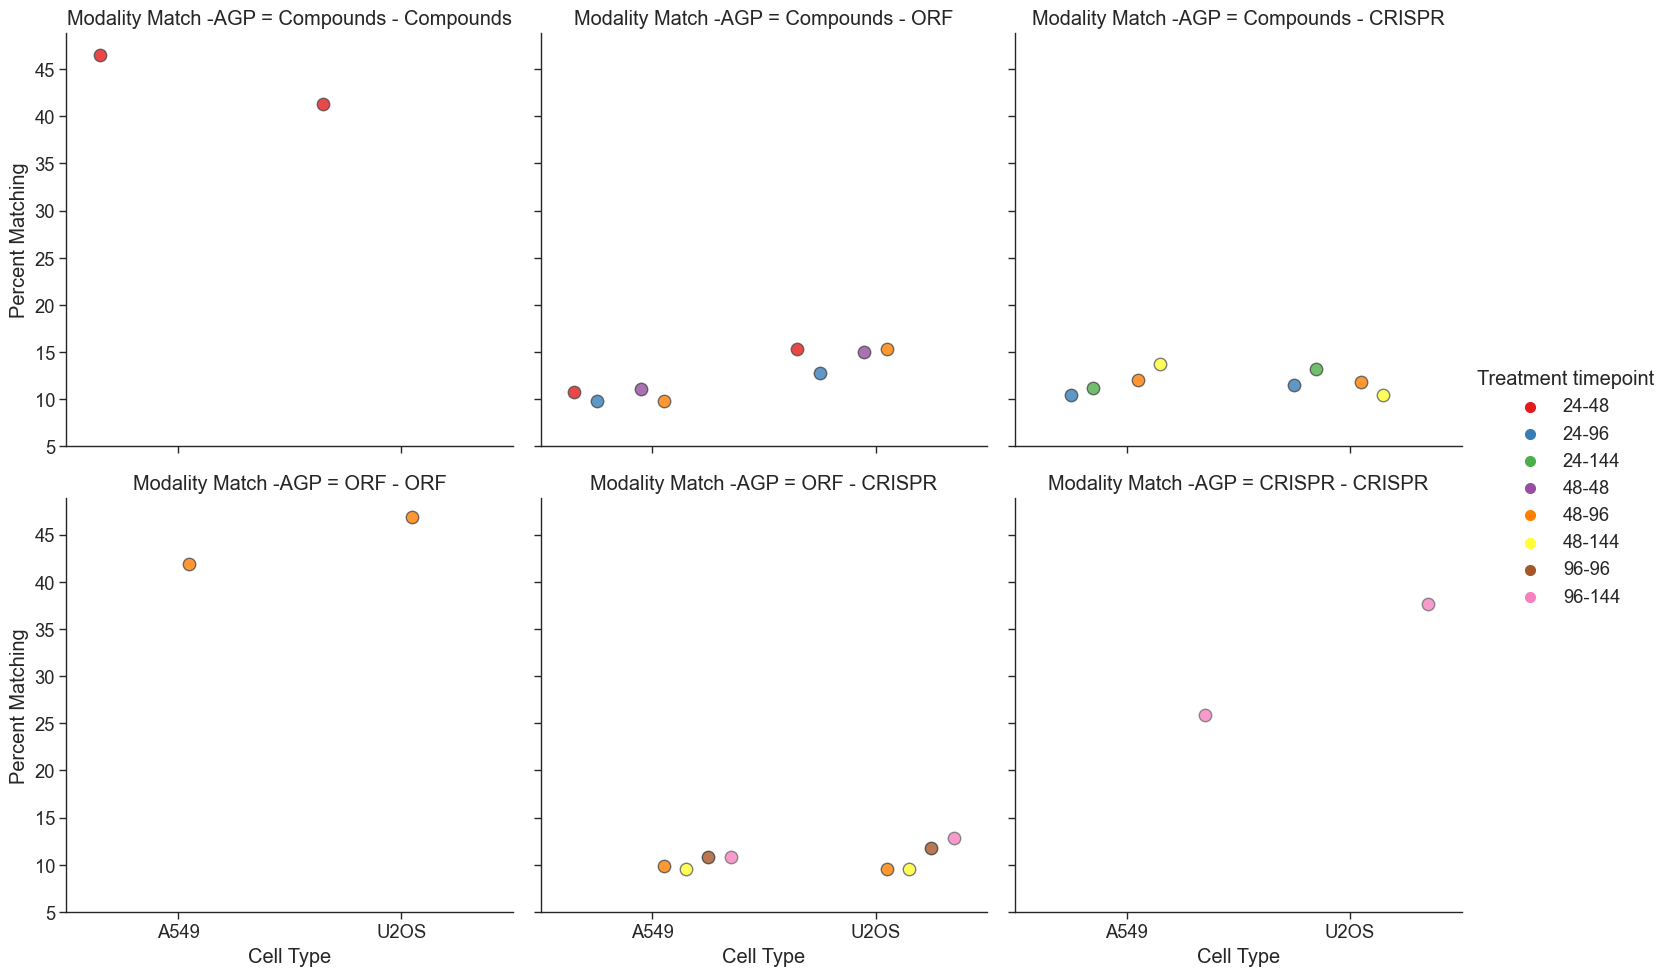

In [6]:
plot_simple_comparison(df=plate_match_df,x=x,y=y,hue=hue,
hue_order=hue_order, col = col, col_order = col_order, col_wrap=3,ylim=[5,40],
plotname=f"{x}-{y}-{hue}-{col}.png")

In [7]:
plate_match_df.to_csv(f'checkpoint_csvs/{variable_to_save}-matching-noAGP.csv',index=False)